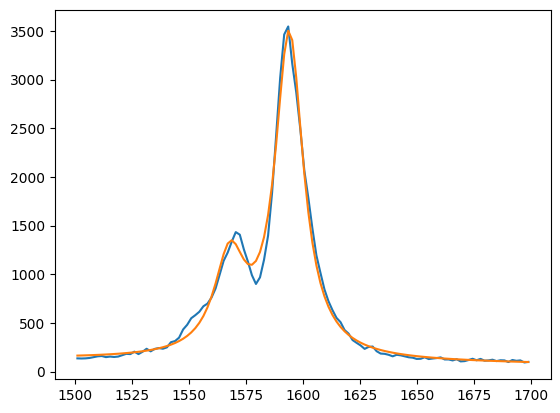

[-2.55389755e-01  5.10918703e+02  2.54568179e+04  1.65599019e+01
  1.56780504e+03  7.83862991e+04  1.50412372e+01  1.59390776e+03]


In [2]:
import numpy as np
import pickle # for loading pickled test data
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings

from scipy.optimize import differential_evolution


# Double Lorentzian peak function
# bounds on parameters are set in generate_Initial_Parameters() below
def double_Lorentz(x, a, b, A, w, x_0, A1, w1, x_01):
    return a*x+b+(2*A/np.pi)*(w/(4*(x-x_0)**2 + w**2))+(2*A1/np.pi)*(w1/(4*(x-x_01)**2 + w1**2))


# function for genetic algorithm to minimize (sum of squared error)
# bounds on parameters are set in generate_Initial_Parameters() below
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    return np.sum((yData - double_Lorentz(xData, *parameterTuple)) ** 2)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)
    
    parameterBounds = []
    parameterBounds.append([-1.0, 1.0]) # parameter bounds for a
    parameterBounds.append([maxY/-2.0, maxY/2.0]) # parameter bounds for b
    parameterBounds.append([0.0, maxY*100.0]) # parameter bounds for A
    parameterBounds.append([0.0, maxY/2.0]) # parameter bounds for w
    parameterBounds.append([minX, maxX]) # parameter bounds for x_0
    parameterBounds.append([0.0, maxY*100.0]) # parameter bounds for A1
    parameterBounds.append([0.0, maxY/2.0]) # parameter bounds for w1
    parameterBounds.append([minX, maxX]) # parameter bounds for x_01

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x



# load the pickled test data from original Raman spectroscopy
data = pickle.load(open('data.pkl', 'rb'))
xData = data[0]
yData = data[1]

# generate initial parameter values
initialParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(double_Lorentz, xData, yData, initialParameters)

# create values for display of fitted peak function
a, b, A, w, x_0, A1, w1, x_01 = fittedParameters
y_fit = double_Lorentz(xData, a, b, A, w, x_0, A1, w1, x_01)

plt.plot(xData, yData) # plot the raw data
plt.plot(xData, y_fit) # plot the equation using the fitted parameters
plt.show()

print(fittedParameters)